# 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR


In [2]:
dataset_folder = r"/Downloads/ML/datasets/"

In [3]:
salary = pd.read_csv(dataset_folder+"Salary_data.csv")

In [4]:
salary.head()
#print(salary.isnull().sum()) check for null values

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
X = salary.iloc[:, :-1].values
Y = salary.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

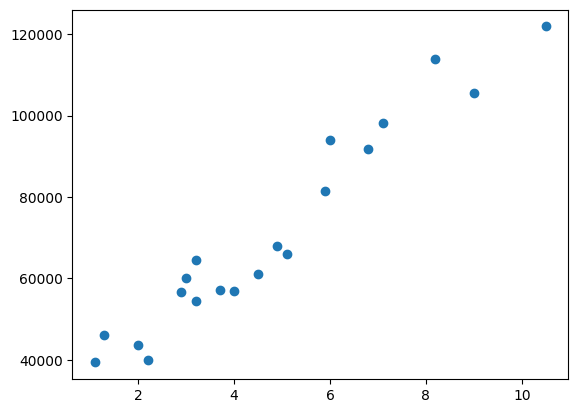

In [6]:
#train plot
plt.scatter(X_train, Y_train)
plt.show()

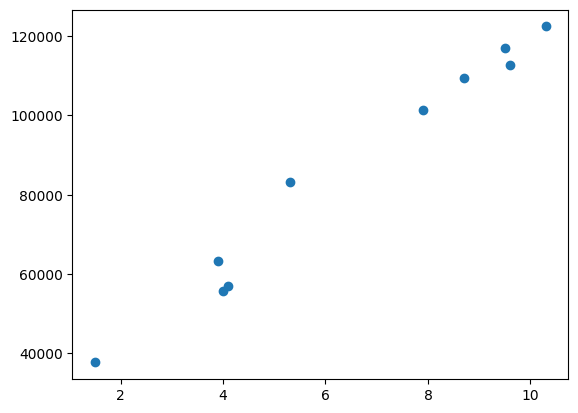

In [7]:
#test plot
plt.scatter(X_test, Y_test)
plt.show()

In [8]:
reg = LR().fit(X_train, Y_train)
print(reg.score(X_train, Y_train))# R^2 value
print(reg.score(X_test, Y_test))

0.9381900012894278
0.9749154407708353


In [9]:
Y_test_pred = reg.predict(X_test)

In [10]:
mean_squared_error(Y_test, Y_test_pred)

21026037.329511296

# 2

In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [12]:
new_data = pd.read_csv(dataset_folder+"K-mean_dataset.csv")

In [13]:
new_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
# delete CUST_ID
new_data.drop(["CUST_ID"], axis=1, inplace=True)

In [15]:
new_data.describe()
#new_data.hist(bins=30)
#new_data.boxplot() # remove any outliers if found

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [16]:
#print(new_data.isnull().sum()) # check for null values

In [17]:
#fill missing values in MINIMUM_PAYMENTS
mean_min_pay = int(new_data.MINIMUM_PAYMENTS.dropna().mean())
new_data['MINIMUM_PAYMENTS'] = new_data['MINIMUM_PAYMENTS'].fillna(mean_min_pay)

In [18]:
#fill missing values in CREDIT_LIMIT
mean_cred_lim = int(new_data.CREDIT_LIMIT.dropna().mean())
new_data['CREDIT_LIMIT'] = new_data['CREDIT_LIMIT'].fillna(mean_cred_lim)

In [19]:
'''Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1

df = new_data[~((new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe()'''

'Q1 = new_data.quantile(0.25)\nQ3 = new_data.quantile(0.75)\nIQR = Q3 - Q1\n\ndf = new_data[~((new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))).any(axis=1)]\ndf.describe()'

In [20]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(new_data)
    Sum_of_squared_distances.append(km.inertia_)

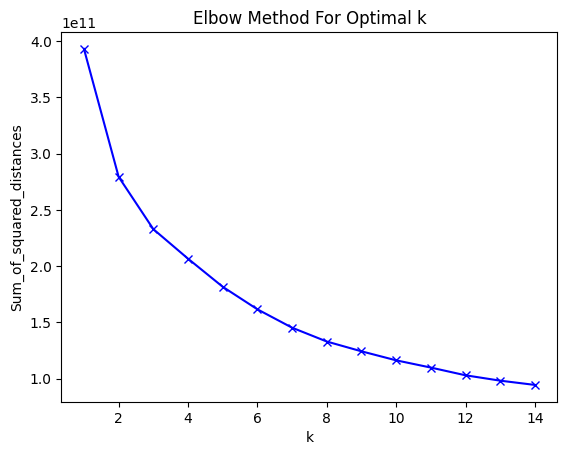

In [21]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
#elbow is at k=5
km = KMeans(n_clusters=5, random_state=0)
km.fit_predict(new_data)
score = silhouette_score(new_data, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.379


In [23]:
mms = MinMaxScaler()
mms.fit(new_data)
data_transformed_mms = mms.transform(new_data)

In [24]:
#elbow is at k=5
km = KMeans(n_clusters=5, random_state=0)
km.fit_predict(data_transformed_mms)
score = silhouette_score(data_transformed_mms, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.319


In [25]:
'''from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(new_data)
df2 = pd.DataFrame(pca.transform(new_data), columns = ['A', 'B', 'C', 'D', 'E'])'''

"from sklearn.decomposition import PCA\npca = PCA(n_components=5)\npca.fit(new_data)\ndf2 = pd.DataFrame(pca.transform(new_data), columns = ['A', 'B', 'C', 'D', 'E'])"

In [26]:
'''fig, axes = plt.subplots(len(df2.columns.values),len(df2.columns.values), sharey=True)

for i, col1 in enumerate(df2.columns.values):
    for j, col2 in enumerate(df2.columns.values):
        
        df2.plot(x=[col1], y=[col2], kind="scatter", ax=axes[i,j])

plt.show()'''

'fig, axes = plt.subplots(len(df2.columns.values),len(df2.columns.values), sharey=True)\n\nfor i, col1 in enumerate(df2.columns.values):\n    for j, col2 in enumerate(df2.columns.values):\n        \n        df2.plot(x=[col1], y=[col2], kind="scatter", ax=axes[i,j])\n\nplt.show()'

In [27]:
'''from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data_transformed_mms)
df3 = pd.DataFrame(pca.transform(data_transformed_mms), columns = ['A', 'B', 'C', 'D', 'E'])'''

"from sklearn.decomposition import PCA\npca = PCA(n_components=5)\npca.fit(data_transformed_mms)\ndf3 = pd.DataFrame(pca.transform(data_transformed_mms), columns = ['A', 'B', 'C', 'D', 'E'])"

In [28]:
'''fig, axes = plt.subplots(len(df3.columns.values),len(df3.columns.values), sharey=True)

for i, col1 in enumerate(df3.columns.values):
    for j, col2 in enumerate(df3.columns.values):
        
        df3.plot(x=[col1], y=[col2], kind="scatter", ax=axes[i,j])

plt.show()'''

'fig, axes = plt.subplots(len(df3.columns.values),len(df3.columns.values), sharey=True)\n\nfor i, col1 in enumerate(df3.columns.values):\n    for j, col2 in enumerate(df3.columns.values):\n        \n        df3.plot(x=[col1], y=[col2], kind="scatter", ax=axes[i,j])\n\nplt.show()'

In [29]:
'''ss = StandardScaler()
ss.fit(new_data)
data_transformed_ss = ss.transform(new_data)'''

'ss = StandardScaler()\nss.fit(new_data)\ndata_transformed_ss = ss.transform(new_data)'

In [30]:
'''#elbow is at k=5
km = KMeans(n_clusters=7, random_state=0)
km.fit_predict(data_transformed_ss)
score = silhouette_score(data_transformed_ss, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)'''

"#elbow is at k=5\nkm = KMeans(n_clusters=7, random_state=0)\nkm.fit_predict(data_transformed_ss)\nscore = silhouette_score(data_transformed_ss, km.labels_, metric='euclidean')\nprint('Silhouetter Score: %.3f' % score)"

In [31]:
'''from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_transformed_ss)
df3 = pd.DataFrame(pca.transform(data_transformed_ss), columns = ['first', 'second'])
df3.plot.scatter(x = 'first', y = 'second')'''

"from sklearn.decomposition import PCA\npca = PCA(n_components=2)\npca.fit(data_transformed_ss)\ndf3 = pd.DataFrame(pca.transform(data_transformed_ss), columns = ['first', 'second'])\ndf3.plot.scatter(x = 'first', y = 'second')"